In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('earthquake_data.csv')
dataset.head(4)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.0,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.0,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.0,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.0,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN


In [3]:
dataset.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [4]:
dataset.shape

(782, 19)

In [5]:
datas=dataset

## Replacing the NaN values in the 'country' column using 'location' column

In [6]:
datas['location']=datas['location'].str.replace(",","",regex=True)
temp=datas['location'].str.split(" ",n=6,expand=True)
temp

,0,1,2,3,4,5,6
0,Malango,Solomon,Islands,None,None,None,None
1,Bengkulu,Indonesia,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neiafu,Tonga,None,None,None,None,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
777,Puerto,El,Triunfo,El,Salvador,None,None
778,Old,Harbor,Alaska,None,None,None,None
779,Port-Olry,Vanuatu,None,None,None,None,None
780,Mindanao,Philippines,None,None,None,None,None


In [7]:
for i in reversed(range(7)):
    if(temp[i]=="").all():
        i=i-1
    elif(temp[i]=='NaN').all():
        i=i-1
    else:
        j=i
    datas['country'].fillna(temp[j],inplace=True)
datas

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,Malango Solomon Islands,Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,Bengkulu Indonesia,NaN,Indonesia
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,Neiafu Tonga,NaN,Tonga
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,Puerto El Triunfo El Salvador,NaN,Salvador
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,Old Harbor Alaska,North America,Alaska
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,Port-Olry Vanuatu,NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,Mindanao Philippines,NaN,Philippines


In [8]:
df=datas.dropna(subset=['alert'])
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert          0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    310
country        3
dtype: int64

In [9]:
df.shape

(415, 19)

In [10]:
df.drop(['title','date_time','tsunami','net','magType','latitude','longitude','location','continent','nst'],axis=1,inplace=True)

C:\Anaconda\envs\aiml\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 507
Data columns (total 9 columns):
magnitude    415 non-null float64
cdi          415 non-null int64
mmi          415 non-null int64
alert        415 non-null object
sig          415 non-null int64
dmin         415 non-null float64
gap          415 non-null float64
depth        415 non-null float64
country      412 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 32.4+ KB


In [12]:
df.head()

,magnitude,cdi,mmi,alert,sig,dmin,gap,depth,country
0,7.0,8,7,green,768,0.509,17.0,14.000,Solomon Islands
1,6.9,4,4,green,735,2.229,34.0,25.000,Indonesia
2,7.0,3,3,green,755,3.125,18.0,579.000,Fiji
3,7.3,5,5,green,833,1.865,21.0,37.000,Tonga
4,6.6,0,2,green,670,4.998,27.0,624.464,NaN


## Identify Quan Qual data and Outliers

In [13]:
descriptive=df.describe()
descriptive

,magnitude,cdi,mmi,sig,dmin,gap,depth
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,6.909880,5.132530,5.727711,891.749398,2.478831,26.733952,98.475092
std,0.419885,2.982117,1.594246,375.919966,2.528986,24.121876,169.671685
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,2.700000
25%,6.600000,3.000000,4.500000,691.000000,0.731000,15.000000,12.795000
50%,6.800000,6.000000,6.000000,747.000000,1.709000,20.000000,25.000000
75%,7.100000,8.000000,7.000000,918.500000,3.622000,31.000000,79.000000
max,8.600000,9.000000,9.000000,2910.000000,17.654000,239.000000,670.810000


In [14]:
quan=[]
qual=[]
for columnName in df.columns:
    if (df[columnName].dtypes=='O'):
        qual.append(columnName)
    else:
        quan.append(columnName)

In [15]:
quan

['magnitude', 'cdi', 'mmi', 'sig', 'dmin', 'gap', 'depth']

In [16]:
qual

['alert', 'country']

In [17]:
describe=pd.DataFrame(index=['Mean','Median','Mode','Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR','1.5Rule','Lesser','Greater','Min','Max','Kurtosis','Skew'],columns=quan)
for columnName in quan:
    describe[columnName]['Mean']=df[columnName].mean()
    describe[columnName]['Median']=df[columnName].median()
    describe[columnName]['Mode']=df[columnName].mode()[0]
    describe[columnName]['Q1:25%']=df.describe()[columnName]['25%']
    describe[columnName]['Q2:50%']=df.describe()[columnName]['50%']
    describe[columnName]['Q3:75%']=df.describe()[columnName]['75%']
    describe[columnName]['99%']=np.percentile(df[columnName],99)
    describe[columnName]['Q4:100%']=df.describe()[columnName]['max']
    describe[columnName]['IQR']=describe[columnName]['Q3:75%']-describe[columnName]['Q1:25%']
    describe[columnName]['1.5Rule']=1.5*describe[columnName]['IQR']
    describe[columnName]['Lesser']=describe[columnName]['Q1:25%']-describe[columnName]['1.5Rule']
    describe[columnName]['Greater']=describe[columnName]['Q3:75%']+describe[columnName]['1.5Rule']
    describe[columnName]['Min']=df[columnName].min()
    describe[columnName]['Max']=df[columnName].max()
    describe[columnName]['Kurtosis']=df[columnName].kurtosis()
    describe[columnName]['Skew']=df[columnName].skew()
describe

,magnitude,cdi,mmi,sig,dmin,gap,depth
Mean,6.90988,5.13253,5.72771,891.749,2.47883,26.734,98.4751
Median,6.8,6,6,747,1.709,20,25
Mode,6.5,0,6,650,0,18,10
Q1:25%,6.6,3,4.5,691,0.731,15,12.795
Q2:50%,6.8,6,6,747,1.709,20,25
Q3:75%,7.1,8,7,918.5,3.622,31,79
99%,8.2,9,9,2749.96,11.3892,118.3,629.604
Q4:100%,8.6,9,9,2910,17.654,239,670.81
IQR,0.5,5,2.5,227.5,2.891,16,66.205
1.5Rule,0.75,7.5,3.75,341.25,4.3365,24,99.3075


### => Get columns that has outliers

In [18]:
Lesser=[]
Greater=[]
for columnName in quan:
    if(describe[columnName]['Min']<describe[columnName]['Lesser']):
        Lesser.append(columnName)
    if (describe[columnName]['Max']>describe[columnName]['Greater']):
        Greater.append(columnName)
Lesser,Greater

([], ['magnitude', 'sig', 'dmin', 'gap', 'depth'])

The data shows the presence of Greater than outliers. But, since it is a natural disaster, the dataset would naturally have uncertain readings with huge variations. Hence Greater than Outlier is not considered as an outlier as it is a real time scenario.

### => Get frequency of the earthquake magnitude

Frequency check is done on the 'magnitude' variable

In [19]:
freqTable=pd.DataFrame(columns=['Unique Values','Frequency','Relative Freq','Cumulative Freq'])
freqTable['Unique Values']=df['magnitude'].value_counts().index
freqTable['Frequency']=df['magnitude'].value_counts().values
freqTable['Relative Freq']=freqTable['Frequency']/freqTable.shape[0]
freqTable['Cumulative Freq']=freqTable['Relative Freq'].cumsum()
freqTable

,Unique Values,Frequency,Relative Freq,Cumulative Freq
0,6.5,78,3.90,3.90
1,6.6,63,3.15,7.05
2,6.9,52,2.60,9.65
3,6.7,46,2.30,11.95
4,6.8,41,2.05,14.00
5,7.0,26,1.30,15.30
6,7.1,22,1.10,16.40
7,7.3,17,0.85,17.25
8,7.5,12,0.60,17.85
9,7.2,11,0.55,18.40


### 1. Which country has highest rate of earthquake occurence?

In [20]:
df['country'].value_counts()

Indonesia                                       43
Islands                                         28
Papua New Guinea                                28
Chile                                           24
region                                          23
                                                ..
Italy                                            1
Australia                                        1
South Georgia and the South Sandwich Islands     1
Cyprus                                           1
Botswana                                         1
Name: country, Length: 62, dtype: int64

In [21]:
#df['country'].value_counts().index
Place=df['country'].value_counts().index[0]
print("The country with highest rate of earthquake occurence is: ",Place)

The country with highest rate of earthquake occurence is:  Indonesia


### 2. What is the Minimum and Maximum magnitude of earthquake in the highest earthquake occuring region?

for count in countries:
    if (count=='Indonesia'):
        indo=df[df['country']==count]
indo

In [22]:
place=df[df['country']==Place]
place

,magnitude,cdi,mmi,alert,sig,dmin,gap,depth,country
1,6.9,4,4,green,735,2.229,34.0,25.00,Indonesia
26,6.7,9,6,green,708,2.188,43.0,28.00,Indonesia
31,6.6,8,6,green,785,2.418,22.0,33.00,Indonesia
40,7.3,8,7,green,921,3.713,19.0,165.49,Indonesia
41,7.3,9,5,green,854,1.025,32.0,14.27,Indonesia
66,6.7,8,4,green,698,1.487,37.0,11.00,Indonesia
89,6.9,4,3,green,749,2.267,20.0,624.00,Indonesia
90,6.9,4,4,green,735,1.716,25.0,26.00,Indonesia
91,6.8,5,4,green,716,1.816,34.0,22.00,Indonesia
95,6.6,4,2,green,684,1.458,14.0,533.76,Indonesia


In [23]:
print(f"IN {Place}\nThe Minimum Magnitude: {place['magnitude'].min()}, The Maximum Magnitude: {place['magnitude'].max()}")

IN Indonesia
The Minimum Magnitude: 6.5, The Maximum Magnitude: 7.8


### 3. How many red alert did the highest earthquake occuring region get? 

In [24]:
HighRed=place[place['alert']=='red']
HighRed

,magnitude,cdi,mmi,alert,sig,dmin,gap,depth,country
159,7.5,8,8,red,2026,1.649,13.0,20.0,Indonesia


In [25]:
print(f"The Number of Red alert earthquake occurence in {Place} is:",HighRed.shape[0])

The Number of Red alert earthquake occurence in Indonesia is: 1


### 4. Which country has the lowest rate of earthquake occurence?

In [26]:
df['country'].value_counts()

Indonesia                                       43
Islands                                         28
Papua New Guinea                                28
Chile                                           24
region                                          23
                                                ..
Italy                                            1
Australia                                        1
South Georgia and the South Sandwich Islands     1
Cyprus                                           1
Botswana                                         1
Name: country, Length: 62, dtype: int64

In [27]:
#countries[countries.values==countries.values.min()]

In [28]:
countries=df['country'].value_counts()
min_earthquake=countries[countries.values==countries.values.min()]
min_earthquake

Mayen                                           1
Honduras                                        1
India                                           1
Mongolia                                        1
Haiti                                           1
Venezuela                                       1
Jamaica                                         1
Tajikistan                                      1
Guam                                            1
Costa Rica                                      1
Italy                                           1
Australia                                       1
South Georgia and the South Sandwich Islands    1
Cyprus                                          1
Botswana                                        1
Name: country, dtype: int64

In [29]:
#countries.values.min()
List=[]
for count in min_earthquake.index:
    List.append(count)
List

['Mayen',
 'Honduras',
 'India',
 'Mongolia',
 'Haiti',
 'Venezuela',
 'Jamaica',
 'Tajikistan',
 'Guam',
 'Costa Rica',
 'Italy',
 'Australia',
 'South Georgia and the South Sandwich Islands',
 'Cyprus',
 'Botswana']

In [30]:
print("The countries with lowest rate of earthquake are:",List)

The countries with lowest rate of earthquake are: ['Mayen', 'Honduras', 'India', 'Mongolia', 'Haiti', 'Venezuela', 'Jamaica', 'Tajikistan', 'Guam', 'Costa Rica', 'Italy', 'Australia', 'South Georgia and the South Sandwich Islands', 'Cyprus', 'Botswana']


### 5. What is the Minimum and Maximum Magnitude of Lowest earthquake occuring areas?

In [31]:
low_earthquake=df[df['country'].isin(List)]
low_earthquake

,magnitude,cdi,mmi,alert,sig,dmin,gap,depth,country
38,6.6,6,6,green,976,1.168,21.0,21.00,Cyprus
53,7.2,9,8,red,2331,1.178,23.0,10.00,Haiti
81,6.7,8,8,green,776,2.043,22.0,10.00,Mongolia
107,7.7,9,6,yellow,1812,1.657,26.0,14.86,Jamaica
123,6.6,5,5,green,791,2.978,32.0,10.00,Australia
144,7.1,0,5,green,776,7.043,20.0,133.00,South Georgia and the South Sandwich Islands
149,6.7,3,4,green,693,7.853,19.0,10.00,Mayen
168,7.3,8,6,yellow,1570,1.822,15.0,146.82,Venezuela
184,7.5,8,5,green,1623,4.581,12.0,19.00,Honduras
189,6.5,8,8,yellow,1153,0.225,37.0,19.36,Costa Rica


In [32]:
Min=low_earthquake['magnitude'].min()
Max=low_earthquake['magnitude'].max()
Min,Max

(6.5, 7.7)

In [33]:
print(f'In Lowest Earthquake Occured Regions\nThe Minimum Magnitude is: {Min} and Maximum Magnitude is: {Max}')

In Lowest Earthquake Occured Regions
The Minimum Magnitude is: 6.5 and Maximum Magnitude is: 7.7


### 6. How many Red Alerts did the lowest earthquake occuring region get?

In [34]:
LowRed=low_earthquake[low_earthquake['alert']=='red']
LowRed.shape[0]
print(f"The Lowest Earthquake Occuring regions has got a total of {LowRed.shape[0]} red alerts\n1. {LowRed['country'][LowRed['country'].index[0]]}\n2. {LowRed['country'][LowRed['country'].index[1]]}")

The Lowest Earthquake Occuring regions has got a total of 2 red alerts
1. Haiti
2. Italy


### 7. List the top 10 earthquake occuring places

In [35]:
Top=df['country'].value_counts()

In [36]:
Top.head(10)

Indonesia           43
Islands             28
Papua New Guinea    28
Chile               24
region              23
Japan               17
Vanuatu             15
Philippines         15
Mexico              14
Alaska              14
Name: country, dtype: int64

### 8. Which country has recorded the highest magnitude of earthquake?

In [37]:
Highest=df[df['magnitude']==df['magnitude'].max()]
Highest
print(f"The Highest magnitude of earthquake is recorded in: {Highest['country'].values} with magnitude of {Highest['magnitude'].values}")

The Highest magnitude of earthquake is recorded in: ['Sumatra'] with magnitude of [8.6]


### 9. Which countries receives more red alert?

In [38]:
max_red_alert=df[df['alert']=='red']
max_red_alert.reset_index(drop=True,inplace=True)
max_red_alert

,magnitude,cdi,mmi,alert,sig,dmin,gap,depth,country
0,7.3,9,8,red,2397,2.9360,29.0,41.000,Japan
1,7.0,8,8,red,2504,0.0700,43.0,20.000,Mexico
2,7.2,9,8,red,2331,1.1780,23.0,10.000,Haiti
3,7.5,8,8,red,2026,1.6490,13.0,20.000,Indonesia
4,7.3,8,9,red,2790,0.2840,33.0,19.000,Iran
5,8.2,9,7,red,2910,0.9440,22.0,47.390,Mexico
6,6.6,9,8,red,2840,0.1740,25.0,8.000,Italy
7,7.0,9,9,red,2074,0.3490,32.0,10.000,Japan
8,7.8,8,9,red,2820,1.8570,12.0,8.220,Nepal
9,7.7,5,8,red,2015,7.2410,17.0,15.000,Pakistan


In [39]:
max_red_alert['country'].value_counts()

Mexico                        3
Japan                         2
Nepal                         1
People's Republic of China    1
Iran                          1
Italy                         1
Indonesia                     1
Pakistan                      1
Haiti                         1
Name: country, dtype: int64

In [40]:
print("The countries which gets more red alert is:",max_red_alert['country'].value_counts().index[0])

The countries which gets more red alert is: Mexico


### 10. List the magnitude of Red alert and its region

In [41]:
List=max_red_alert.drop(columns=['cdi','mmi','alert','sig','dmin','gap','depth'],inplace=False)
List

,magnitude,country
0,7.3,Japan
1,7.0,Mexico
2,7.2,Haiti
3,7.5,Indonesia
4,7.3,Iran
5,8.2,Mexico
6,6.6,Italy
7,7.0,Japan
8,7.8,Nepal
9,7.7,Pakistan


In [42]:
countries=List['country'].value_counts().index
for countries in countries:
    if(List['country']==countries).any():
        fake=List[List['country']==countries]
        fake.shape[0]
        print(f'{countries} was hit by the Magnitude of',fake['magnitude'].values)

Mexico was hit by the Magnitude of [7.  8.2 7.2]
Japan was hit by the Magnitude of [7.3 7. ]
Nepal was hit by the Magnitude of [7.8]
People's Republic of China was hit by the Magnitude of [6.6]
Iran was hit by the Magnitude of [7.3]
Italy was hit by the Magnitude of [6.6]
Indonesia was hit by the Magnitude of [7.5]
Pakistan was hit by the Magnitude of [7.7]
Haiti was hit by the Magnitude of [7.2]


### 11. Which data field is highly correlated and least correlated with 'Magnitude'?

In [43]:
df.corr()

,magnitude,cdi,mmi,sig,dmin,gap,depth
magnitude,1.000000,0.302778,0.291257,0.498681,-0.082050,-0.061823,0.059514
cdi,0.302778,1.000000,0.545142,0.463554,-0.246807,0.091758,-0.248450
mmi,0.291257,0.545142,1.000000,0.495045,-0.298610,0.087138,-0.529665
sig,0.498681,0.463554,0.495045,1.000000,-0.190977,0.151993,-0.124659
dmin,-0.082050,-0.246807,-0.298610,-0.190977,1.000000,-0.116060,0.083762
gap,-0.061823,0.091758,0.087138,0.151993,-0.116060,1.000000,-0.162981
depth,0.059514,-0.248450,-0.529665,-0.124659,0.083762,-0.162981,1.000000


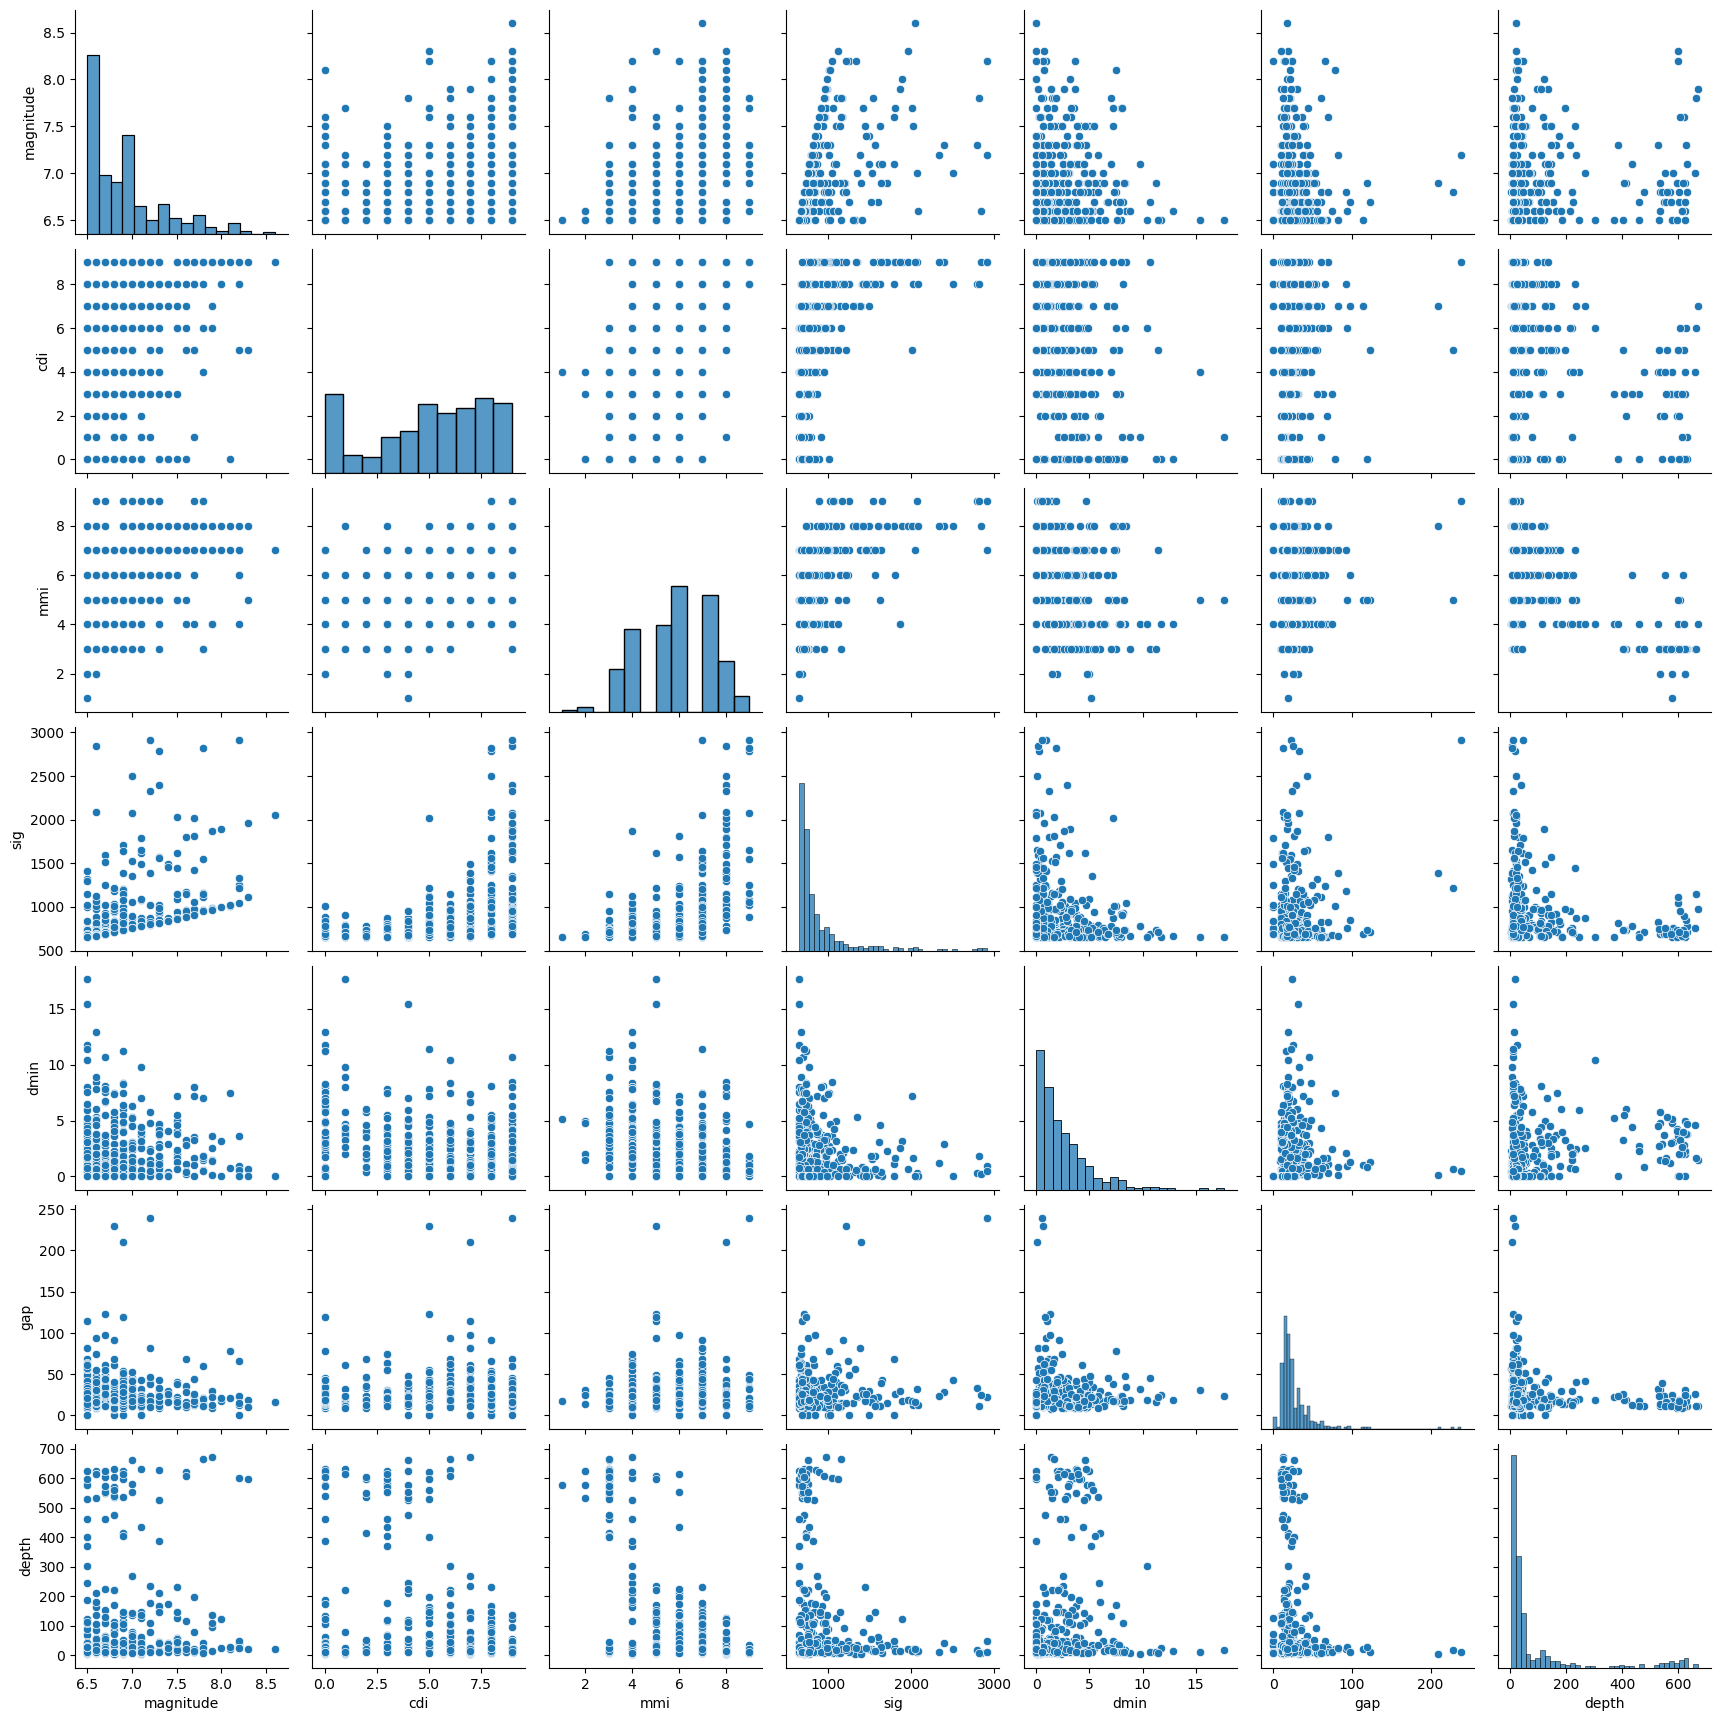

In [44]:
import seaborn as sns
sns.pairplot(df)

From the table and plot,
Columns: cdi, mmi, sig, and depth are low degree positively correlated with magnitude. Columns: dmin and gap are low degree negatively correlated with magnitude.
Why considering "magnitude" column for analysis? It's because magnitude is the seismic measure to determine the strength of the earthquake. 

Among the quantitative data, 'sig' is more linearly correlated with 'magnitude'.
Quantitative data that is negative linearly correlated with 'magnitude' is 'dmin' 

###### Using ANOVA to check the significant relation between all the metrics with 'alert'

In [45]:
import scipy.stats as stats
green=df[df['alert']=='green']
yellow=df[df['alert']=='yellow']
orange=df[df['alert']=='orange']
red=df[df['alert']=='red']
df[quan].columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'dmin', 'gap', 'depth'], dtype='object')

In [46]:
Outputs=[]
fields=df[quan].columns
for Columns in fields:
    #metric=df[Columns]
    #alert=df['alert']
    statis,p_value=stats.f_oneway(green[Columns],yellow[Columns],orange[Columns],red[Columns])
    Outputs.append(p_value)
Outputs
val=0.05
i=0
for check in Outputs:
    if check<val:
        print(f"Reject Null Hypothesis: There is a significant difference between green, yellow, orange and red data of {fields[i]}")
    else:
        print(f"Accept Null Hypothesis: There is no significant difference between green, yellow, orange and red data of {fields[i]}")
    i=i+1

Reject Null Hypothesis: There is a significant difference between green, yellow, orange and red data of magnitude
Reject Null Hypothesis: There is a significant difference between green, yellow, orange and red data of cdi
Reject Null Hypothesis: There is a significant difference between green, yellow, orange and red data of mmi
Reject Null Hypothesis: There is a significant difference between green, yellow, orange and red data of sig
Accept Null Hypothesis: There is no significant difference between green, yellow, orange and red data of dmin
Reject Null Hypothesis: There is a significant difference between green, yellow, orange and red data of gap
Reject Null Hypothesis: There is a significant difference between green, yellow, orange and red data of depth


The significant difference between the quantitative data is checked within the column based on alert 'green', yellow, 'orange', and 'red'. The results are:
1. 'magnitude' w.r.t. green, yellow, orange and red categories: p_value (3.0795722679234603e-06) is less than 0.05. Hence reject null hypothesis that suggests that there is a significant difference between the magnitude with respect to the alert range 'green', 'yellow', 'orange', and 'red'  

2. 'cdi' w.r.t. green, yellow, orange and red categories: p_value (2.5827288035808773e-24) is less than 0.05. Hence reject null hypothesis that suggests that there is a significant difference between the cdi with respect to the alert range 'green', 'yellow', 'orange', and 'red'

3. 'mmi' w.r.t. green, yellow, orange and red categories: p_value (2.3858080426064636e-38) is less than 0.05. Hence reject null hypothesis that suggests that there is a significant difference between the mmi with respect to the alert range 'green', 'yellow', 'orange', and 'red'

4. 'sig' w.r.t. green, yellow, orange and red categories: p_value (8.154776253845562e-109) is less than 0.05. Hence reject null hypothesis that suggests that there is a significant difference between the sig with respect to the alert range 'green', 'yellow', 'orange', and 'red'

5. 'dmin' w.r.t. green, yellow, orange and red categories: p_value (0.06498382944848269) is greater than 0.05. Hence fail to reject null hypothesis that suggests that there is no significant difference between the dmin with respect to the alert range 'green', 'yellow', 'orange', and 'red'

6. 'gap' w.r.t. green, yellow, orange and red categories: p_value (0.021260655578676794) is less than 0.05. Hence reject null hypothesis that suggests that there is a significant difference between the gap with respect to the alert range 'green', 'yellow', 'orange', and 'red'

7. 'depth' w.r.t. green, yellow, orange and red categories: p_value (0.00286263161104186) is less than 0.05. Hence reject null hypothesis that suggests that there is a significant difference between the depth with respect to the alert range 'green', 'yellow', 'orange', and 'red'

In [47]:
final=df.drop(['country'],axis=1)

In [49]:
final.to_csv('preprocessedEarthquake.csv',index=False)